# Group Average Components Plot NoteBook
### imports

In [1]:
import numpy as np
import nibabel as nib
from mvlearn.embed import GCCA
from nilearn.plotting import plot_surf_stat_map
import matplotlib.colors as colors
from matplotlib import pyplot as plt
import  warnings ; warnings.simplefilter('ignore')
%matplotlib inline

/home/yvonne/PycharmProjects/pythonProject/GCCA/venv/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


# Build our color map

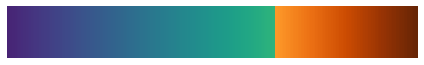

In [2]:
first = int((128 * 2) - np.round(255 * (1. - 0.65)))
second = (256 - first)
colors2 = plt.cm.viridis(np.linspace(0.1, .65, first))
colors3 = plt.cm.YlOrBr(np.linspace(0.5, 1., second))
colors1 = plt.cm.viridis(np.linspace(0., .98, first))
colors4 = plt.cm.YlOrBr(np.linspace(0.3, 0.90, second))
# combine them and build a new colormap
cols1 = np.vstack((colors2, colors3))
cols2 = np.vstack((colors1, colors4))

mymap1 = colors.LinearSegmentedColormap.from_list('my_colormap1', cols1)

num = 256
gradient = range(num)
for x in range(5):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=mymap1, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()

# load surfaces and cortex label

In [3]:
surf_lh = nib.freesurfer.read_geometry('DanielData/fsaverage5/surf/lh.inflated')
surf_rh = nib.freesurfer.read_geometry('DanielData/fsaverage5/surf/rh.inflated')

cort_lh = nib.freesurfer.read_label('DanielData/fsaverage5/label/lh.cortex.label')
cort_rh = nib.freesurfer.read_label('DanielData/fsaverage5/label/rh.cortex.label')
cort = np.concatenate((cort_lh, cort_rh + 10242))

# load subject timeseries

In [4]:
data = []
subjs = ['010005', '010017', '010018', '010021', '010024', '010032', '010042', '010056', '010060']
for s in subjs:
    data.append(np.load('DanielData/timeseries.sub-%s.npy' % s))
print(np.shape(data))

(9, 18715, 2608)


# Running GCCA

In [5]:
gcca = GCCA()
gcca.fit(data)
projs = gcca.transform(data)

print(gcca.ranks_)
print(np.shape(projs))

np.save('gcca_results.npy', projs)

(6, 8, 6, 7, 5, 7, 7, 8, 6)
(9, 18715, 5)


# set visualization parameters

In [6]:
n_comps = np.shape(projs)[2]
if n_comps > 5:  # set max number of components to show at 5
    n_comps = 5

n_subs = np.shape(projs)[0]

n_views = 4  # number of brains to show per component
fig_width = 10

# Visualize group-level average components

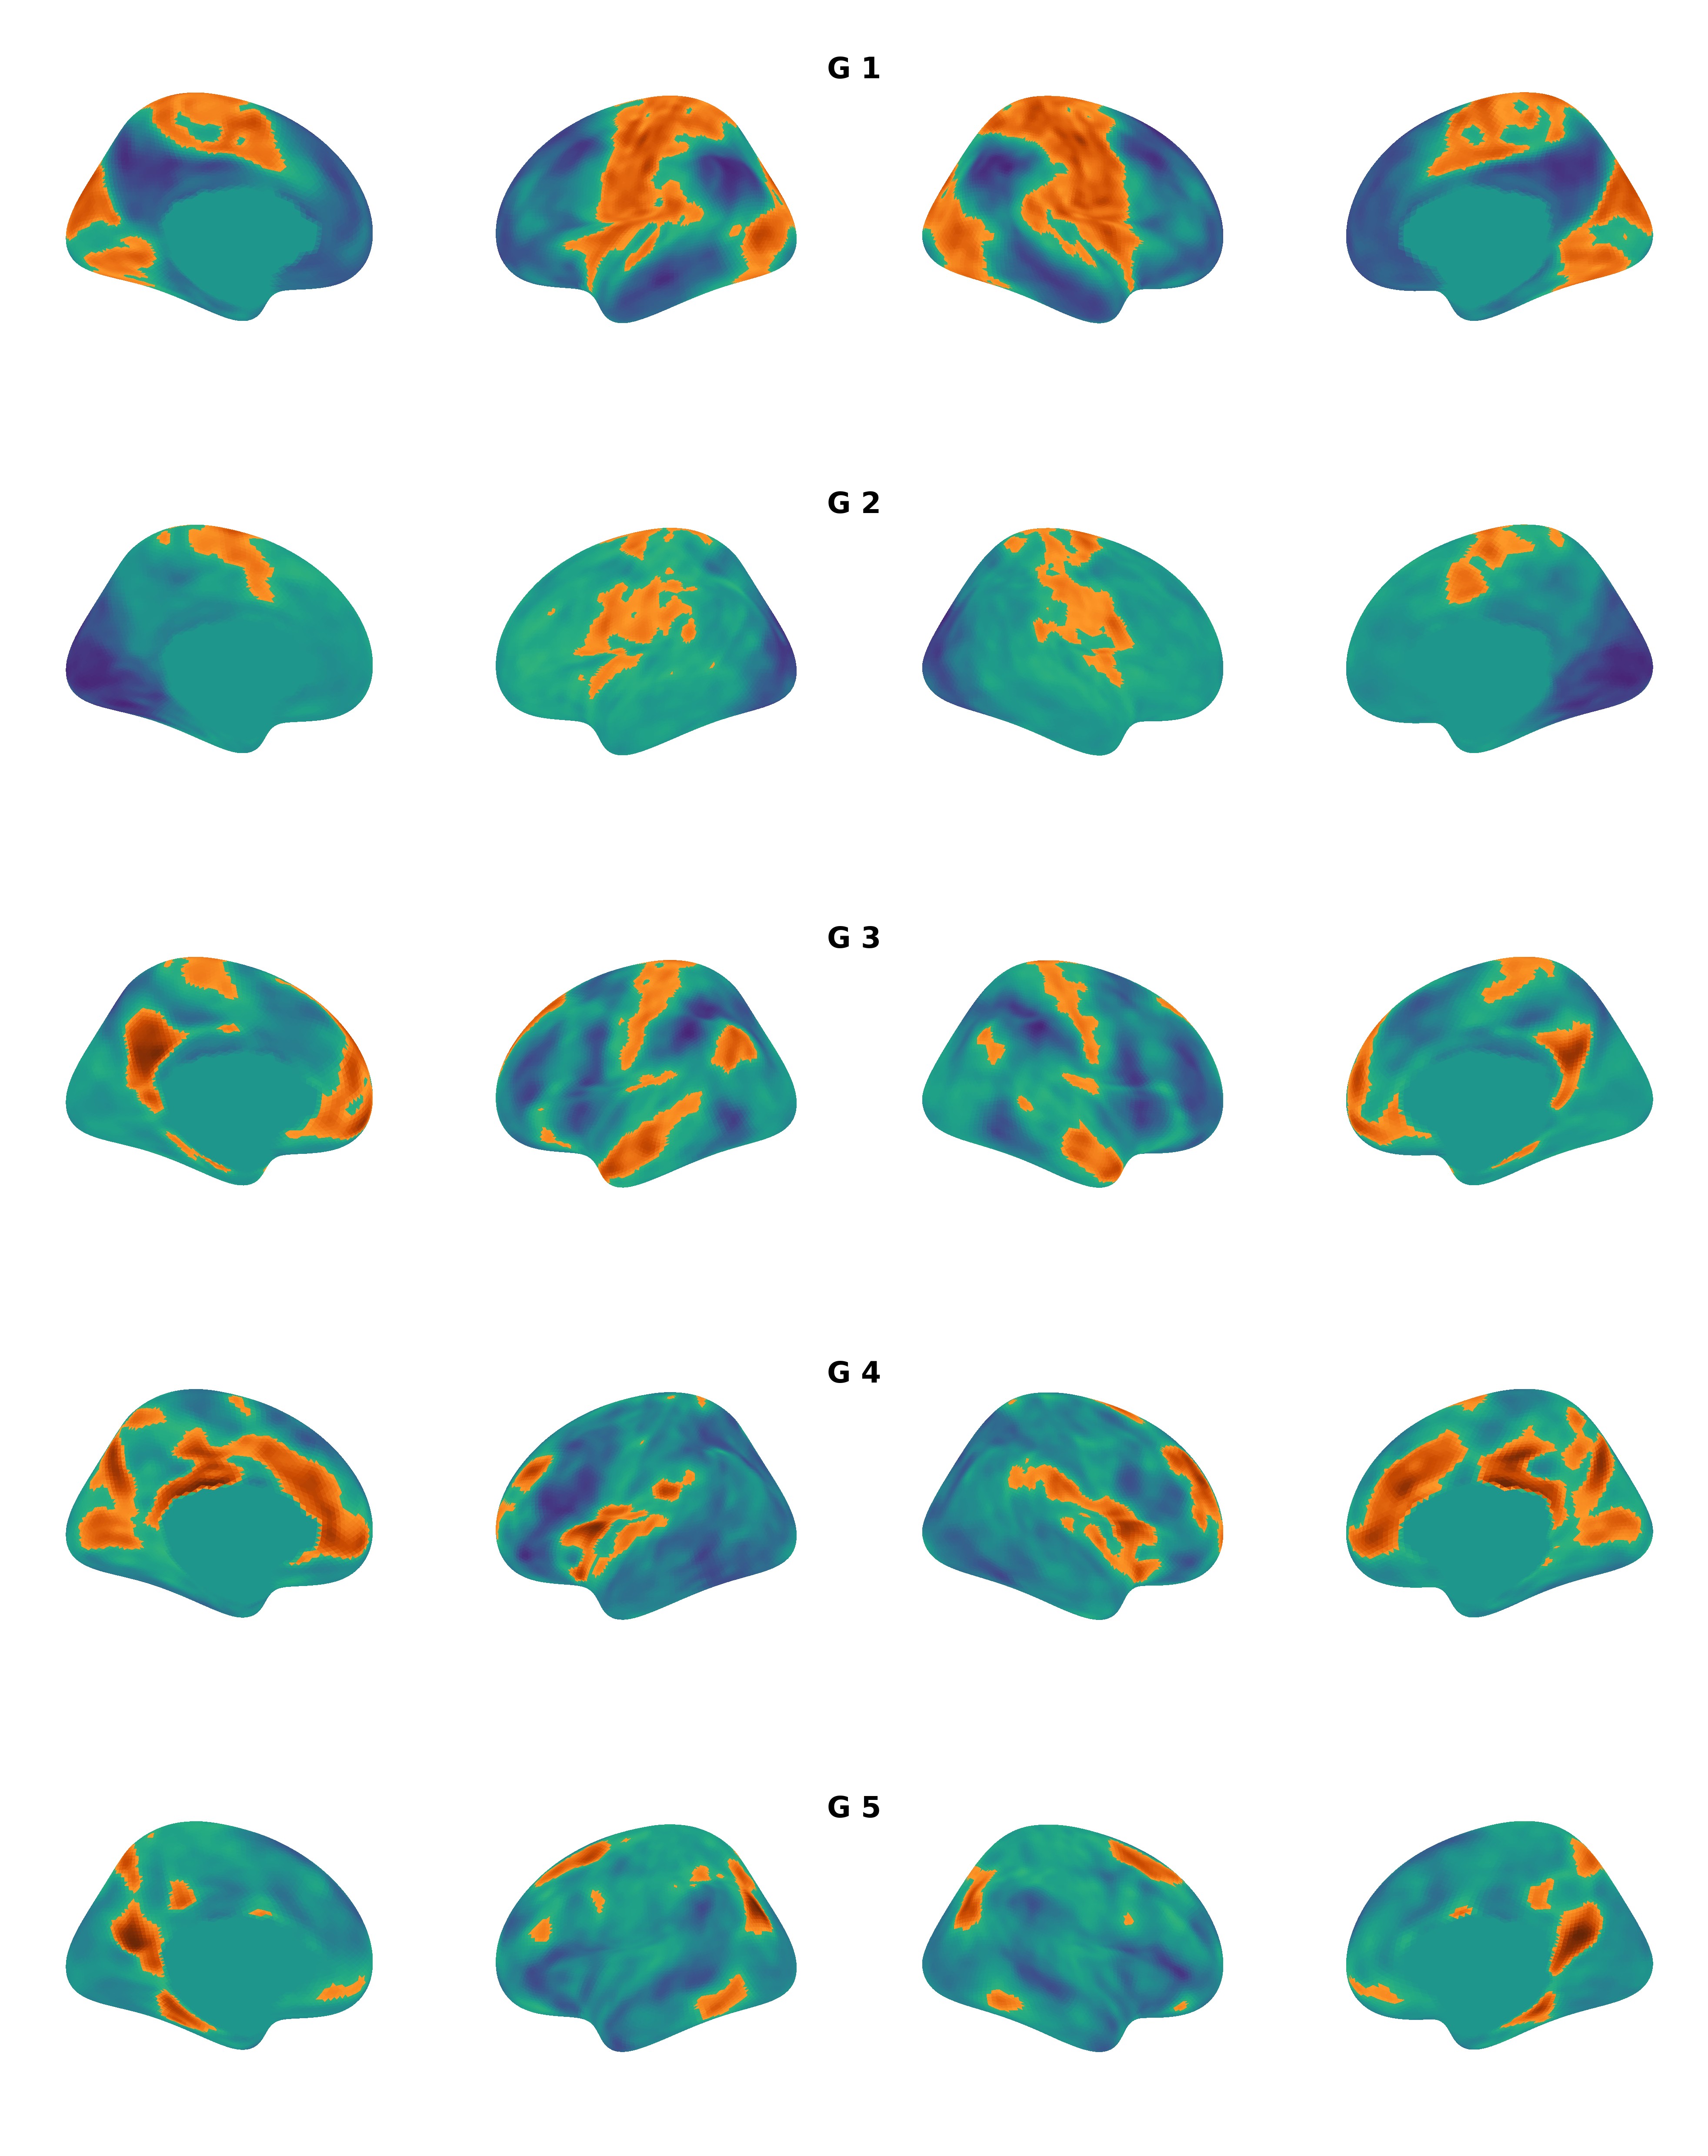

In [7]:
fig = plt.figure(figsize=(fig_width, fig_width * n_comps * 0.25), dpi=400)
for component in range(n_comps):
    ax1 = fig.add_subplot(n_comps, n_views, component * n_views + 1, projection='3d')
    ax2 = fig.add_subplot(n_comps, n_views, component * n_views + 2, projection='3d')
    ax3 = fig.add_subplot(n_comps, n_views, component * n_views + 3, projection='3d')
    ax4 = fig.add_subplot(n_comps, n_views, component * n_views + 4, projection='3d')
    res = np.zeros(10242)
    res[cort_lh] = np.mean(np.asarray(projs)[:, :len(cort_lh), component], axis=0)
    plax1 = plot_surf_stat_map(surf_lh, res, hemi='left', view='medial', axes=ax1, colorbar=False, cmap=mymap1)
    plax2 = plot_surf_stat_map(surf_lh, res, hemi='left', view='lateral', axes=ax2, colorbar=False, cmap=mymap1)
    res = np.zeros(10242)
    res[cort_rh] = np.mean(np.asarray(projs)[:, len(cort_lh):, component], axis=0)

    plax3 = plot_surf_stat_map(surf_rh, res, hemi='right', view='lateral', axes=ax3, colorbar=False, cmap=mymap1)
    plax4 = plot_surf_stat_map(surf_rh, res, hemi='right', view='medial', axes=ax4, colorbar=False, cmap=mymap1)
    plt.figtext(0.5, 0.96 - (1. / n_comps) * component, 'G %i' % int(int(component) + 1),
                horizontalalignment='center', fontsize='large',fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.1,wspace=0.05)

In [8]:
filename = 'group.png'
plt.savefig(filename, dpi=400)
plt.show()


<Figure size 432x288 with 0 Axes>